In [180]:
# lets listify the contents
what_were_covering = [
    "0. an end-to-end scikit-learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm to it and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improving a model",
    "6. Saving and loading a trained model",
    "7. Putting it all together"]


## 0. an end to end Scikit-learn workflow

In [181]:
# Get the data ready 
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [182]:
# Create X (features matrix)

X = heart_disease.drop("target",axis=1)

# Create Y (labels)

y = heart_disease["target"]

In [183]:
 # 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [184]:
# Fit the model to training data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

In [185]:
clf.fit(X_train , y_train);

In [186]:
# make a prediction 

y_preds = clf.predict(X_test)

# y_preds is the convention for making predictions on test data

y_preds

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [187]:
y_test

219    0
171    0
150    1
15     1
205    0
      ..
280    0
192    0
81     1
250    0
73     1
Name: target, Length: 61, dtype: int64

In [188]:
# Evaluate the model on the training and test data
clf.score(X_train , y_train)

1.0

In [189]:
clf.score(X_test , y_test)

0.8524590163934426

In [190]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.91      0.83      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [191]:
confusion_matrix(y_test , y_preds)

array([[22,  3],
       [ 6, 30]])

In [192]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [193]:
# 5. improve the model
# Try different amount of n-estimators

np.random.seed(42)

# we use seed so that the results are replicable

for i in range(10,200,10):
    print( f"Trying the model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f" Model accuracy on test set: {clf.score(X_test,y_test) * 100:.2f}%")
    print(" ")

Trying the model with 10 estimators...
 Model accuracy on test set: 85.25%
 
Trying the model with 20 estimators...
 Model accuracy on test set: 81.97%
 
Trying the model with 30 estimators...
 Model accuracy on test set: 85.25%
 
Trying the model with 40 estimators...
 Model accuracy on test set: 85.25%
 
Trying the model with 50 estimators...
 Model accuracy on test set: 83.61%
 
Trying the model with 60 estimators...
 Model accuracy on test set: 83.61%
 
Trying the model with 70 estimators...
 Model accuracy on test set: 81.97%
 
Trying the model with 80 estimators...
 Model accuracy on test set: 83.61%
 
Trying the model with 90 estimators...
 Model accuracy on test set: 80.33%
 
Trying the model with 100 estimators...
 Model accuracy on test set: 80.33%
 
Trying the model with 110 estimators...
 Model accuracy on test set: 85.25%
 
Trying the model with 120 estimators...
 Model accuracy on test set: 83.61%
 
Trying the model with 130 estimators...
 Model accuracy on test set: 78.6

In [194]:
# save a model and load it 

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

# here wb means write binary

In [195]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8360655737704918

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

1. Split the data into features and labels (usually 'X' and 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)


In [196]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [197]:
X = heart_disease.drop("target",axis=1)

In [198]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [199]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [200]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [201]:
X.shape

(303, 13)

In [202]:
len(heart_disease)

303

In [203]:
X.shape[0]*0.8

242.4

## 1.1 Make sure it's all numerical

In [204]:
car_sales = pd.read_csv("scikit-learn-data/car-sales-extended.csv")

In [205]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [206]:
len(car_sales)

1000

In [207]:
#  Split into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Split into train and test set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [208]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [ ]:
# Our ML model cannot deal with strings, so we have to convert those strings into numbers.

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
car_sales.head()

In [ ]:
categorical_features = ["Make" , "Colour" , "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                  one_hot,
                                  categorical_features)],
                                remainder = "passthrough")

# takes one hot encoder and applies it to the categorical features and for the remainder of the columns, passthrough ,i.e, dont do anything


transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(transformed_X,y,test_size=0.2)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
#  Import car sales missing data
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

In [ ]:
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

# converting our categories to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" , one_hot , categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

#### Option-1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace = True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" Column
car_sales_missing["Doors"].fillna(4,inplace=True)


In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]


In [ ]:
# Converting our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

 ### Option:2 Fill missing values with Scikit-learn

In [ ]:
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

In [ ]:
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into X and y
X =  car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
# filling missing values is also called imputation
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant" , fill_value="missing")
door_imputer = SimpleImputer(strategy = "constant" , fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (smth that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_data_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Doors","Odometer (KM)"])

In [ ]:
car_data_filled.head()

In [ ]:
car_data_filled.isna().sum()

In [ ]:
#  Now we convert our data into numbers
#  Turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_data_filled)
transformed_X

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)


model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
# its done worse that original bc it has lesser samples than the original

len(car_data_filled) , len(car_sales)

In [ ]:
what_were_covering

## 2. Choosing the right estimator/algorithm for our problems

Some things to note:

* Sklearn refers to machine learning models, algos as estimators
* Classification problem - predicting a category (heart disease or not)
   * clf is short for classifier used as a classifier estimator
* Regression problem: predicting a number (selling price of a car)

## Picking a machine learning model for a regression dataset

Lets use the california housing dataset

In [ ]:
#  get cali housing dataset
from sklearn.datasets import fetch_california_housing
housing  = fetch_california_housing()

In [ ]:
housing

In [ ]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df

In [ ]:
housing_df["target"] = housing["target"]
housing_df

In [ ]:
housing_df.drop("MedHouseVal",axis=1)

In [ ]:
# Import algorithms
from sklearn.linear_model import Ridge 

# Setup random seed
np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)
# instantiate and fit the model on the training set
model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)


In [ ]:
housing_df.info()

If ridge didnt work , we could always try a different model

Lets try an ensemble model, it is a combination of smaller models to make better predictions than a single model

In [ ]:
#  import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

## 2.2 Picking an ML model for classification

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")

In [ ]:
heart_disease.head()

In [ ]:
heart_disease.shape

In [ ]:
# trying linear SVC 

In [ ]:
# Importing the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
heart_disease.target.value_counts()

In [ ]:
# Importing the random forest classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

Tidbit :
       1. If you have structured data, use ensemble methods.
       2. If you have unstructured data , use deep learning or transfer learning.

In [ ]:
what_were_covering

## 3. Fitting the model

### 3.1 Fitting the model to the data

Different names for :
* 'X' = features, feature variables,data
* 'y' = labels,targets, target variables

### 3.2 Make predictions using an ML model

2 ways to make predicitons
1.predict()
2.predict_proba()

In [ ]:

# Using a trained model to make predictions
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
X_train

In [ ]:
clf.predict(X_test)

In [ ]:
y_test


In [ ]:
np.array([y_test])

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

Make predictions with `predict_proba()`


In [ ]:
# predict_proba() returns probabs of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# Using predict on the same data we get
clf.predict(X_test[:5])

`predict()` can also be used for regression models 

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)

# make predictions
y_preds = model.predict(X_test)


In [ ]:
y_preds[:10]

In [ ]:
np.array([y_test[:10]])

In [ ]:
len(y_preds)

In [ ]:
len(y_test)

In [ ]:
#  compare predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [ ]:
housing_df["target"]

In [ ]:
what_were_covering

## Evaluating an ML model

Three ways to evaluate sklearn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model witht the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# instantiate RFC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

In [ ]:
# The highest value for the .score() method is 1.0 and the lowest is 0.0
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

Lets use the `score` on our regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split into testing and training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# create model instance
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)


In [ ]:
model.score(X_test,y_test)

In [ ]:
housing_df.head()

### 4.2 Evaluating a model using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
cross_val_score(clf,X,y)

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))

# compare
clf_single_score, clf_cross_val_score

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv = 5, scoring=None)

### Classification model evaluation metrics

1. Accuracy
2. Area under the ROC curve
3. Confusion matrix
4. Classification report

** Area under receiver operating characteristics curve (AUC/ROC) **

* Area under curve(AUC)
* ROC curve

  ROC curves are a comparision of a model's true positive rate (tpr) versus a model's false positive rate (fpr).


* tp = model predicts 1 when truth is 1
* fp = model predicts 1 when truth is 0
* tn = model predicts 0 when truth is 0
* fn = model predicts 0 when truth is 1

In [ ]:
# Create X_test.... etc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)


# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [ ]:
fpr

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model.
    """
    # Plot ROC curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

In [ ]:
#  Plot perfect ROC curve and AUC score
fpr , tpr , thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

**Confusion Matrix** 

A confusion matrix is a quick way to compare what the model predicts and the actual labels it wants to predict.

In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)



In [ ]:
#  Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

In [ ]:
24 + 26 + 8 + 3

In [ ]:
# Making our confusion matrix more visual with seaborn's heatmap()

# seaborn is a visualization library built on top of matplotlib

import seaborn as sns

# Set font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

# or just go to terminal, activate conda path and do conda install seaborn

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

In [ ]:
pd.crosstab(y_test,y_preds,
           rownames=["actual label"],
           colnames=["predicted label"])

In [ ]:
### Creating a confusion matrix using Scikit-learn

import sklearn
sklearn.__version__

In [ ]:
clf

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)
                                      

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

**precision**: proportion true positives, when it is predicted 1 and its actually also 1. a model that has no false negatives has a precision of 1.0

**recall**: proportion of actual positives that were correctly classified. 

**F1 score** : a combo of precision and recall

**support**: no of samples each metric was calculated on , ex out of 61 samples , 32 were classified 0 and 29 were classified 1.

**macro avg**: The avg precision, recall and F1 score between classes.

**Weighted avg**: Weighted avg, weighted avg precision,recall and F1 score bw classes

In [210]:
#  where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 #only one positive case

disease_preds = np.zeros(10000) #Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

# will give error if u dont use output_dict = True

/Users/avanidhagam/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/avanidhagam/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/avanidhagam/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

we're gonna cover:

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [211]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [212]:
model.score(X_test,y_test)

0.8059809073051385

R^2 determines how much of the target variable (dependant variable) can be predicted from the independent variable.

In [213]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [214]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [215]:
y_test.mean()

2.0550030959302323

In [216]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean()) 
# basically says, numpy take an array the length of y_tets and fill it with y_test.mean


In [217]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [218]:
r2_score(y_true = y_test,y_pred = y_test_mean)

0.0

**R^2**

What R-square does: Compares your model's predictions to the mean of the target's. 
Values can change from negative infinity(a very poor model) to 1.

for example: if all our model does is predict the mean of the targets, the R^2 value would be 0.
if our model perfectly predicts a range of numbers its R^2 value would be 1.

**Mean Absolute Error**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how __wrong__ your model's predictions are

In [219]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)

In [220]:
mae

0.3270458119670544

In [221]:
y_preds

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [222]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [223]:
df = pd.DataFrame(data={"actual values" : y_test,
                        "predicted values" : y_preds})
df["differences"] = df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [224]:
np.abs(df["differences"]).mean()

0.3270458119670544

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between the actual and the predicted values.

In [225]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2542443610174998

In [226]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [227]:
#  Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2542443610174998

In [228]:
# what if the sqaured_difference is very large for one

df_large_error = df.copy()
df_large_error.iloc[1]["squared_differences"]=16

In [229]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,16.000000
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [230]:
df_large_error["squared_differences"].mean()

0.25809825210952986

doesnt change at all smh, lets introduce a few more large errors

In [231]:
df_large_error.iloc[1:100]["squared_differences"]=20
df_large_error

/var/folders/t4/46xzgspd42j_z1zwvwzgkfrr0000gn/T/ipykernel_30118/3418443753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[1:100]["squared_differences"]=20


,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,16.000000
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [232]:
df_large_error["squared_differences"].mean()

0.25809825210952986

**WHICH REGRESSION METRIC TO USE???**

* R2 is similar to accuracy. Quick indication of how well our model is doing.
Generally, the closer your R^2 value is to 1.0, the better the model. But it doesnt really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of our model's predictions are on an average.

* As for MAE or MSE, because of the wya MSE is calculated, squaring the differences between predicted and actual values, it amplifies larger differences. Let's say we're predicting the value of houses:
  * When we pay more attention to MAE: Being 10,000 off is twice as bad as being 5,000 off 
  * When we pay more attention to MSE: Being 10,000 off is more than twice as bad as being 5,000 off.

### 4.2.3 Finally using the `scoring` parameter

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [234]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X,y,cv=5,scoring = None)

# If scoring = None then estimator's default evaluation metric is used i.e, accuracy for classification models

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [235]:
# Cross Validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [236]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [237]:
print(f'the cross-validated accuracy using scoring = "accuracy" is: {np.mean(cv_acc)*100:.2f}% ')

the cross-validated accuracy using scoring = "accuracy" is: 82.48% 


**Precision**

Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model produces no false positives has a precision of 1.0.

In [238]:
# Precision

np.random.seed(42)

cv_precision = cross_val_score(clf , X , y , cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [239]:
print(f'the cross-validated accuracy using scoring = "precision" is : {np.mean(cv_precision)*100:.2f}')

the cross-validated accuracy using scoring = "precision" is : 83.30


**Recall** 

ALL apples: no of apples classified correctly/ total apples

In [240]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [241]:
# cross validated recall
print(f'The cross validated recall is : {np.mean(cv_recall)}')

The cross validated recall is : 0.8545454545454545


Let's the the `scoring` parameter being used for a **regression** problem

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

model.score(...)
A model uses the coeff of determination as a default metric.


In [243]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6538469004539024

The higher the value of cv_r2 , the better the model.

In [244]:
# Mean absolute error
cv_mae = cross_val_score(model,X,y,cv=3,scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4841684007897287

In [245]:
# Mean squared error
cv_mse = cross_val_score(model,X,y,cv=3,scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.460811076287665

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module.

In [246]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train,y_train)

# make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}")

Classifier metrics on the test set
Accuracy: 85.25
Precision: 84.85
Recall: 87.50
F1: 86.15


In [249]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation function
print(f"R2 score : {r2_score(y_test,y_preds)*100:.2f}")
print(f"mean absolute error : {mean_absolute_error(y_test,y_preds)*100:.2f}")
print(f"mean squared error : {mean_squared_error(y_test,y_preds)*100:.2f}")


R2 score : 81.28
mean absolute error : 31.96
mean squared error : 24.16


In [250]:
what_were_covering

['0. an end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm to it and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Saving and loading a trained model',
 '7. Putting it all together']

## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Can we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters

Parameters: model finds these patterns on the data

Hyperparameters: settings on a model you can adjust to improve its ability to find patterns.


In [252]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [253]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by Hand

make 3 sets - training, validation and test.



we're going to try and adjust: 
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [266]:
def evaluate_preds(y_true,y_preds):
    """ 
    Performs evaluation comparision on y_true labels vs y_preds labels 
    on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)

    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    print(f"accuracy:{accuracy*100:.2f}%")
    print(f"precision:{precision*100:.2f}%")
    print(f"recall:{recall*100:.2f}%")
    print(f"f1:{f1*100:.2f}%")

    return metric_dict
    

In [268]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
# we can do that using sample function with frac=1, which basically means 100% of the data will get shuffled
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]


# Split the data into train, validation and test sets
train_split = round(0.7*len(heart_disease_shuffled))  #70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) #15% of the data
# In the above equation, we are doing train_split + , bc we are indexing , so we want to take the 15% AFTER thr train split

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

accuracy:80.00%
precision:86.21%
recall:83.33%
f1:84.75%


{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.83, 'f1': 0.85}

In [262]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [271]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf2.predict(X_valid)

clf2_metrics = evaluate_preds(y_valid,y_preds_2)

accuracy:88.89%
precision:90.32%
recall:93.33%
f1:91.80%


In [272]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf3.predict(X_valid)

clf3_metrics = evaluate_preds(y_valid,y_preds_3)

accuracy:86.67%
precision:87.50%
recall:93.33%
f1:90.32%


## 5.2 Hyperparameter tuning using RandomizedSearchCV

In [277]:
from sklearn.model_selection import RandomizedSearchCV

# A grid is basically a dictionary

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": [ "sqrt", "log2", None],  # Include valid options for max_features
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}


np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# split into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)
# n jobs dictates how much of the processor you want to dedicate towards the certain ml model

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose = 2)

# fit the randomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_est

In [278]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [279]:
# Make predictions witht he best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

accuracy:91.80%
precision:91.18%
recall:93.94%
f1:92.54%


## 5.3 Hyperparameter tuning using GridSearchCV

In [280]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

Main difference bw RandomizedSearch and GridSearch is that the latter is more of a brute search approach.

In [292]:
grid_2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}


In [293]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate random forestclassisfier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

Here are some common values for n_jobs:

n_jobs = -1: This will use all available cores on your machine.

n_jobs = 1: This will use only one core, performing the training sequentially.

n_jobs = 2, n_jobs = 3, ...: This will use the specified number of cores.

In [294]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [296]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

accuracy:85.25%
precision:85.29%
recall:87.88%
f1:86.57%


Lets compare our different model metrics

This is why we've been using dictionaries, so that we can finally plot all of them

<Axes: >

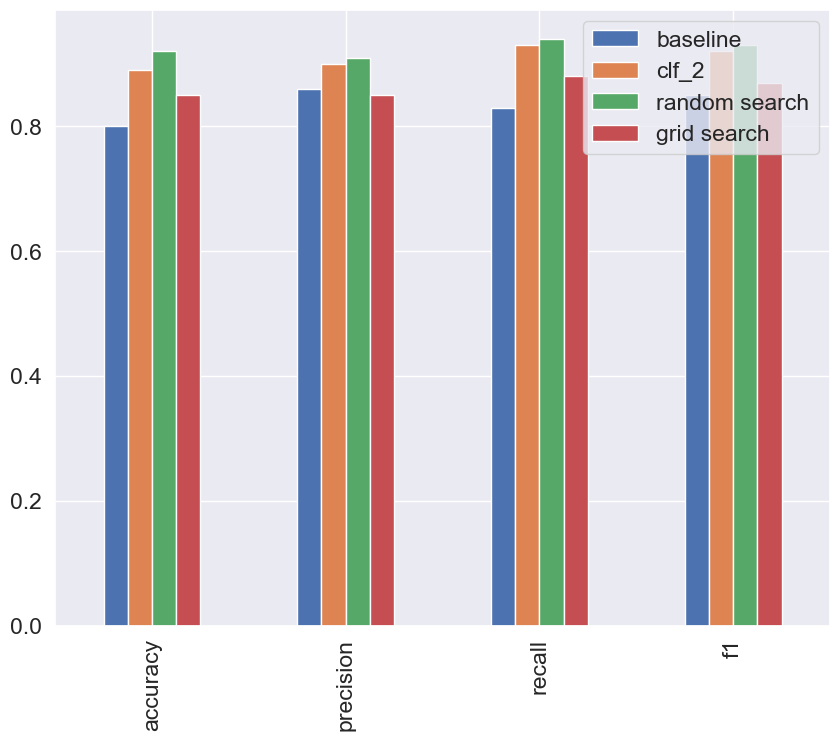

In [299]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2":clf2_metrics,
                                "random search":rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

In [300]:
what_were_covering

['0. an end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm to it and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Saving and loading a trained model',
 '7. Putting it all together']

## 6. Saving and loading trained ML models

Two ways to save and load ML models:
1. With python's `pickle` model
2. With the `joblib` model

**pickle**

The pickle module implements binary protocols for serializing and deserializing a python object structure.  

In our case the python object is our model

In [302]:
import pickle

In [304]:
# save an existing model to a file
pickle.dump(gs_clf,open("gs_random_forest_model.pkl","wb"))
# pickle.dump(name of model, open("name of file you want to same it was"),"wb" or write binary bc we're writing it in


In [305]:
# Load a saved pickle file
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl","rb"))

In [306]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

accuracy:85.25%
precision:85.29%
recall:87.88%
f1:86.57%


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.87}

**Joblib**

In [307]:
from joblib import dump,load

# save model to file
dump(gs_clf,filename = "gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [309]:
# import a saved joblib model
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [311]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

accuracy:85.25%
precision:85.29%
recall:87.88%
f1:86.57%


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.87}

Use joblib instead of numpy when you have largy numPy arrays

In [312]:
what_were_covering

['0. an end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm to it and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Saving and loading a trained model',
 '7. Putting it all together']

##  7. Putting it all together!

In [315]:
data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

In [316]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [317]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [318]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do : (all in one cell)
1. fill in missing data
2. Convert data to numbers
3. Build a model on the data

In [322]:
# Getting our data ready
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)
# seed so that the results are reproducible

# import data and drop rows with missing labels/missing price values
data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"],inplace =True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert it to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                    ("cat",categorical_transformer,categorical_features),
                    ("door",door_transformer,door_features),
                    ("num",numerical_transformer,numerical_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])


# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [324]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":['sqrt', 'log2'],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(estimator=model,param_grid=pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [325]:
gs_model.score(X_test,y_test)

0.28553567798887214